In [1]:


import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import Image

# Defining the maximum power exchange rate and energy managment strategy

In [2]:
## How system looks like

Image('system.png')

FileNotFoundError: No such file or directory: 'system.png'

FileNotFoundError: No such file or directory: 'system.png'

<IPython.core.display.Image object>

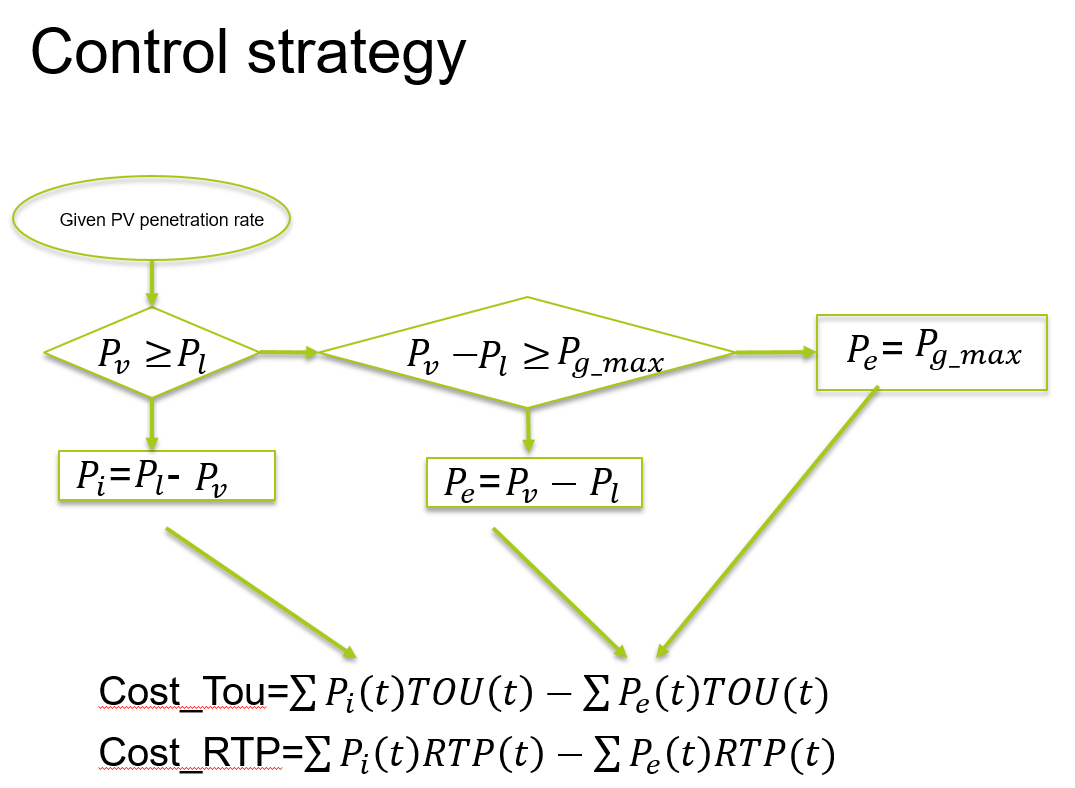

In [316]:
Image('CONTROL1.png')

In [324]:
df_whole=pd.read_csv('Whole_data.csv')

In [325]:
df_whole

,date_time,Real-Time,TOU,W/h,P_output(w/h)
0,1/1/2016 0:00,0.701849,0.5594,439.524,0.0
1,1/1/2016 1:00,0.696592,0.5594,355.366,0.0
2,1/1/2016 2:00,0.691870,0.5594,271.904,0.0
3,1/1/2016 3:00,0.636504,0.5594,204.421,0.0
4,1/1/2016 4:00,0.601309,0.5594,182.323,0.0
...,...,...,...,...,...
61363,12/31/2022 19:00,0.171802,0.5594,577.738,0.0
61364,12/31/2022 20:00,0.127846,0.5594,538.820,0.0
61365,12/31/2022 21:00,0.243200,0.5594,513.474,0.0
61366,12/31/2022 22:00,0.210816,0.5594,478.848,0.0


In [326]:
df_whole['Kw/h']=df_whole['W/h']/1000
df_whole['P_output(Kw/h)']=df_whole['P_output(w/h)']/1000

In [327]:
df_whole.drop('W/h',axis=1,inplace=True)
df_whole.drop('P_output(w/h)',axis=1,inplace=True)

In [328]:
df_whole

,date_time,Real-Time,TOU,Kw/h,P_output(Kw/h)
0,1/1/2016 0:00,0.701849,0.5594,0.439524,0.0
1,1/1/2016 1:00,0.696592,0.5594,0.355366,0.0
2,1/1/2016 2:00,0.691870,0.5594,0.271904,0.0
3,1/1/2016 3:00,0.636504,0.5594,0.204421,0.0
4,1/1/2016 4:00,0.601309,0.5594,0.182323,0.0
...,...,...,...,...,...
61363,12/31/2022 19:00,0.171802,0.5594,0.577738,0.0
61364,12/31/2022 20:00,0.127846,0.5594,0.538820,0.0
61365,12/31/2022 21:00,0.243200,0.5594,0.513474,0.0
61366,12/31/2022 22:00,0.210816,0.5594,0.478848,0.0


In [265]:
# P_s_max  maimum power that can be export to or import from the gird
P_s_max=3

Condition=[(df_whole['P_output(Kw/h)']>=df_whole['Kw/h']) & (df_whole['P_output(Kw/h)']-df_whole['Kw/h']>=P_s_max),
           (df_whole['P_output(Kw/h)']<df_whole['Kw/h']),
           (df_whole['P_output(Kw/h)']>=df_whole['Kw/h']) &(df_whole['P_output(Kw/h)']-df_whole['Kw/h']<P_s_max )]

Choices=[P_s_max, df_whole['Kw/h']-df_whole['P_output(Kw/h)'], -1*(df_whole['P_output(Kw/h)']-df_whole['Kw/h'])]

df_whole['Aribitrage']=np.select(Condition,Choices,default=0)

In [266]:
df_whole.head(18)

,date_time,Real-Time,TOU,Kw/h,P_output(Kw/h),Aribitrage
0,1/1/2016 0:00,0.701849,0.5594,0.439524,0.000000,0.439524
1,1/1/2016 1:00,0.696592,0.5594,0.355366,0.000000,0.355366
2,1/1/2016 2:00,0.691870,0.5594,0.271904,0.000000,0.271904
3,1/1/2016 3:00,0.636504,0.5594,0.204421,0.000000,0.204421
4,1/1/2016 4:00,0.601309,0.5594,0.182323,0.000000,0.182323
5,1/1/2016 5:00,0.575450,0.5594,0.176320,0.000000,0.176320
6,1/1/2016 6:00,0.555063,0.5594,0.191893,0.000000,0.191893
7,1/1/2016 7:00,0.551844,0.5594,0.210337,0.000000,0.210337
8,1/1/2016 8:00,0.525555,0.6861,0.259521,0.018000,0.241521
9,1/1/2016 9:00,0.581566,0.6861,0.303630,0.028168,0.275462


In [267]:
P=df_whole['Aribitrage'].max()
P

0.740225

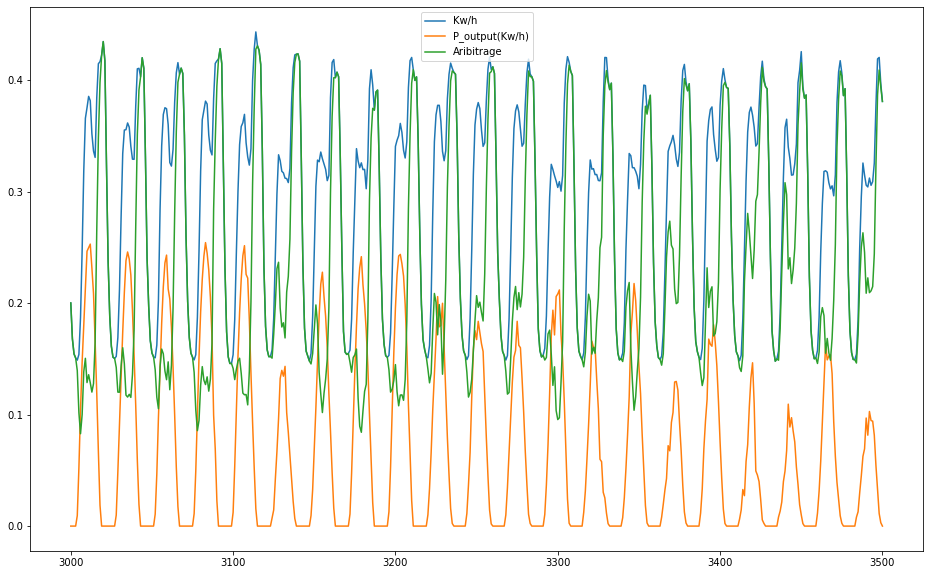

In [268]:
start_idx =3000
end_idx =3500 

# define the columns you want to draw
cols_to_draw = ['Kw/h', 'P_output(Kw/h)','Aribitrage']

# use iloc to draw the desired columns for the desired range of indexes
sub_df_whole = df_whole.loc[start_idx:end_idx, cols_to_draw]

# create the graph
sub_df_whole.plot(kind='line',figsize=(16, 10))

plt.show()

In [269]:
df_whole.describe()

,Real-Time,TOU,Kw/h,P_output(Kw/h),Aribitrage
count,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000
mean,0.620380,0.619719,0.331089,0.041246,0.289843
std,0.266724,0.063278,0.121163,0.061955,0.140864
min,-1.522032,0.559400,0.144565,0.000000,-0.077125
25%,0.474464,0.559400,0.229723,0.000000,0.179568
50%,0.603884,0.559400,0.326366,0.002698,0.260298
75%,0.738680,0.686100,0.400323,0.065032,0.378654
max,3.844769,0.686100,0.740225,0.368626,0.740225


In [270]:
# to check the values of data
df_whole['result'] =  df_whole['P_output(Kw/h)']<0

# get the indices where the result is True
indices = df_whole.index[df_whole['result'] == True].tolist()
# print the indices
print(indices)

[]


In [272]:
df_whole

,date_time,Real-Time,TOU,Kw/h,P_output(Kw/h),Aribitrage,result
0,1/1/2016 0:00,0.701849,0.5594,0.439524,0.0,0.439524,False
1,1/1/2016 1:00,0.696592,0.5594,0.355366,0.0,0.355366,False
2,1/1/2016 2:00,0.691870,0.5594,0.271904,0.0,0.271904,False
3,1/1/2016 3:00,0.636504,0.5594,0.204421,0.0,0.204421,False
4,1/1/2016 4:00,0.601309,0.5594,0.182323,0.0,0.182323,False
...,...,...,...,...,...,...,...
61363,12/31/2022 19:00,0.171802,0.5594,0.577738,0.0,0.577738,False
61364,12/31/2022 20:00,0.127846,0.5594,0.538820,0.0,0.538820,False
61365,12/31/2022 21:00,0.243200,0.5594,0.513474,0.0,0.513474,False
61366,12/31/2022 22:00,0.210816,0.5594,0.478848,0.0,0.478848,False


In [274]:
indices


[]

In [275]:
df_whole['cost_senario1']=df_whole['Aribitrage']*df_whole['TOU']
df_whole['cost_senario2']=df_whole['Aribitrage']*df_whole['Real-Time']

In [276]:
df_whole

,date_time,Real-Time,TOU,Kw/h,P_output(Kw/h),Aribitrage,result,cost_senario1,cost_senario2
0,1/1/2016 0:00,0.701849,0.5594,0.439524,0.0,0.439524,False,0.245870,0.308480
1,1/1/2016 1:00,0.696592,0.5594,0.355366,0.0,0.355366,False,0.198792,0.247545
2,1/1/2016 2:00,0.691870,0.5594,0.271904,0.0,0.271904,False,0.152103,0.188122
3,1/1/2016 3:00,0.636504,0.5594,0.204421,0.0,0.204421,False,0.114353,0.130115
4,1/1/2016 4:00,0.601309,0.5594,0.182323,0.0,0.182323,False,0.101991,0.109632
...,...,...,...,...,...,...,...,...,...
61363,12/31/2022 19:00,0.171802,0.5594,0.577738,0.0,0.577738,False,0.323187,0.099256
61364,12/31/2022 20:00,0.127846,0.5594,0.538820,0.0,0.538820,False,0.301416,0.068886
61365,12/31/2022 21:00,0.243200,0.5594,0.513474,0.0,0.513474,False,0.287237,0.124877
61366,12/31/2022 22:00,0.210816,0.5594,0.478848,0.0,0.478848,False,0.267868,0.100949


In [277]:
Cost_senario1=df_whole['cost_senario1'].sum()
print(Cost_senario1)


11157.318377815871


In [278]:
Cost_senario2=df_whole['cost_senario2'].sum()
print(Cost_senario2)

11529.262461771561


In [331]:
# defining  new peneratartion rates
# define a range of values to multiply the column by
Penertation_rate = range(1, 11)

# multiply the column by each value in the range and save the results in new columns
for value in Penertation_rate:
    new_col_name = f'penetration_{value}'
    df_whole[new_col_name] = df_whole['P_output(Kw/h)'] * value

# print the updated DataFrame
df_whole

,date_time,Real-Time,TOU,Kw/h,P_output(Kw/h),penetration_1,penetration_2,penetration_3,penetration_4,penetration_5,penetration_6,penetration_7,penetration_8,penetration_9,penetration_10
0,1/1/2016 0:00,0.701849,0.5594,0.439524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/1/2016 1:00,0.696592,0.5594,0.355366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/1/2016 2:00,0.691870,0.5594,0.271904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/1/2016 3:00,0.636504,0.5594,0.204421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/1/2016 4:00,0.601309,0.5594,0.182323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61363,12/31/2022 19:00,0.171802,0.5594,0.577738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61364,12/31/2022 20:00,0.127846,0.5594,0.538820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61365,12/31/2022 21:00,0.243200,0.5594,0.513474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61366,12/31/2022 22:00,0.210816,0.5594,0.478848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [332]:
# Define P_s_max rate
# define a range of values to multiply the column by
P_s_max_rate = range(1, 11)

# multiply the column by each value in the range and save the results in new columns
for value in Penertation_rate:
    new_col_name = f'penetration_{value}'
    df_whole[new_col_name] = df_whole['P_output(Kw/h)'] * value

# print the updated DataFrame
df_whole

,date_time,Real-Time,TOU,Kw/h,P_output(Kw/h),penetration_1,penetration_2,penetration_3,penetration_4,penetration_5,penetration_6,penetration_7,penetration_8,penetration_9,penetration_10
0,1/1/2016 0:00,0.701849,0.5594,0.439524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/1/2016 1:00,0.696592,0.5594,0.355366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/1/2016 2:00,0.691870,0.5594,0.271904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/1/2016 3:00,0.636504,0.5594,0.204421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/1/2016 4:00,0.601309,0.5594,0.182323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61363,12/31/2022 19:00,0.171802,0.5594,0.577738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61364,12/31/2022 20:00,0.127846,0.5594,0.538820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61365,12/31/2022 21:00,0.243200,0.5594,0.513474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61366,12/31/2022 22:00,0.210816,0.5594,0.478848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [333]:
columns=['penetration_1', 'penetration_2','penetration_3','penetration_4','penetration_5','penetration_6',
        'penetration_7','penetration_8','penetration_9','penetration_10']
arbitrage=['Arbitrage_1','Arbitrage_2', 'Arbitrage_3', 'Arbitrage_4', 'Arbitrage_5', 'Arbitrage_6',
           'Arbitrage_7','Arbitrage_8','Arbitrage_9','Arbitrage_10']

for i in range(len(columns)):
    col= columns[i]
    arbitr= arbitrage[i] 
    Condition=[(df_whole[col]>=df_whole['Kw/h']) & (df_whole[col]-df_whole['Kw/h']>=P_s_max),
           (df_whole[col]<df_whole['Kw/h']),
           (df_whole[col]>=df_whole['Kw/h']) &(df_whole[col]-df_whole['Kw/h']<P_s_max )]
    Choices=[P_s_max, df_whole['Kw/h']-df_whole[col], -1*(df_whole[col]-df_whole['Kw/h'])]

    df_whole[arbitr]=np.select(Condition,Choices,default=0) 
 

In [334]:
df_whole

,date_time,Real-Time,TOU,Kw/h,P_output(Kw/h),penetration_1,penetration_2,penetration_3,penetration_4,penetration_5,...,Arbitrage_1,Arbitrage_2,Arbitrage_3,Arbitrage_4,Arbitrage_5,Arbitrage_6,Arbitrage_7,Arbitrage_8,Arbitrage_9,Arbitrage_10
0,1/1/2016 0:00,0.701849,0.5594,0.439524,0.0,0.0,0.0,0.0,0.0,0.0,...,0.439524,0.439524,0.439524,0.439524,0.439524,0.439524,0.439524,0.439524,0.439524,0.439524
1,1/1/2016 1:00,0.696592,0.5594,0.355366,0.0,0.0,0.0,0.0,0.0,0.0,...,0.355366,0.355366,0.355366,0.355366,0.355366,0.355366,0.355366,0.355366,0.355366,0.355366
2,1/1/2016 2:00,0.691870,0.5594,0.271904,0.0,0.0,0.0,0.0,0.0,0.0,...,0.271904,0.271904,0.271904,0.271904,0.271904,0.271904,0.271904,0.271904,0.271904,0.271904
3,1/1/2016 3:00,0.636504,0.5594,0.204421,0.0,0.0,0.0,0.0,0.0,0.0,...,0.204421,0.204421,0.204421,0.204421,0.204421,0.204421,0.204421,0.204421,0.204421,0.204421
4,1/1/2016 4:00,0.601309,0.5594,0.182323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.182323,0.182323,0.182323,0.182323,0.182323,0.182323,0.182323,0.182323,0.182323,0.182323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61363,12/31/2022 19:00,0.171802,0.5594,0.577738,0.0,0.0,0.0,0.0,0.0,0.0,...,0.577738,0.577738,0.577738,0.577738,0.577738,0.577738,0.577738,0.577738,0.577738,0.577738
61364,12/31/2022 20:00,0.127846,0.5594,0.538820,0.0,0.0,0.0,0.0,0.0,0.0,...,0.538820,0.538820,0.538820,0.538820,0.538820,0.538820,0.538820,0.538820,0.538820,0.538820
61365,12/31/2022 21:00,0.243200,0.5594,0.513474,0.0,0.0,0.0,0.0,0.0,0.0,...,0.513474,0.513474,0.513474,0.513474,0.513474,0.513474,0.513474,0.513474,0.513474,0.513474
61366,12/31/2022 22:00,0.210816,0.5594,0.478848,0.0,0.0,0.0,0.0,0.0,0.0,...,0.478848,0.478848,0.478848,0.478848,0.478848,0.478848,0.478848,0.478848,0.478848,0.478848


In [335]:
p =  df_whole['Arbitrage_9'].max()
# indices2 = df_whole.index[df_whole['result'] == True].tolist()

p
# # print the indices
# print(indices2)

0.740225

In [336]:
cost_s1=['cost_senario1_penetration_1','cost_senario1_penetration_2','cost_senario1_penetration_3', 'cost_senario1_penetration_4',
                          'cost_senario1_penetration_5', 'cost_senario1_penetration_6', 'cost_senario1_penetration_7',
                          'cost_senario1_penetration_8','cost_senario1_penetration_9','cost_senario1_penetration_10']

Ar=['Arbitrage_1','Arbitrage_2', 'Arbitrage_3', 'Arbitrage_4', 'Arbitrage_5', 'Arbitrage_6',
           'Arbitrage_7','Arbitrage_8','Arbitrage_9','Arbitrage_10']
for i in range(len(cost_s1)):
    cost_senario1_penetration_value=cost_s1[i]
    arbi= Ar[i] 
    df_whole[cost_senario1_penetration_value]=df_whole[arbi]*df_whole['TOU']

In [337]:
cost_s2=['cost_senario2_penetration_1','cost_senario2_penetration_2','cost_senario2_penetration_3', 'cost_senario2_penetration_4',
                          'cost_senario2_penetration_5', 'cost_senario2_penetration_6', 'cost_senario2_penetration_7',
                          'cost_senario2_penetration_8','cost_senario2_penetration_9','cost_senario2_penetration_10']
Ar=['Arbitrage_1','Arbitrage_2', 'Arbitrage_3', 'Arbitrage_4', 'Arbitrage_5', 'Arbitrage_6',
           'Arbitrage_7','Arbitrage_8','Arbitrage_9','Arbitrage_10']
for i in range(len(cost_s2)):
    cost_senario2_penetration_value2=cost_s2[i]
    arbi= Ar[i] 
    df_whole[cost_senario2_penetration_value2]=df_whole[arbi]*df_whole['Real-Time']

In [338]:
df_whole

,date_time,Real-Time,TOU,Kw/h,P_output(Kw/h),penetration_1,penetration_2,penetration_3,penetration_4,penetration_5,...,cost_senario2_penetration_1,cost_senario2_penetration_2,cost_senario2_penetration_3,cost_senario2_penetration_4,cost_senario2_penetration_5,cost_senario2_penetration_6,cost_senario2_penetration_7,cost_senario2_penetration_8,cost_senario2_penetration_9,cost_senario2_penetration_10
0,1/1/2016 0:00,0.701849,0.5594,0.439524,0.0,0.0,0.0,0.0,0.0,0.0,...,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480
1,1/1/2016 1:00,0.696592,0.5594,0.355366,0.0,0.0,0.0,0.0,0.0,0.0,...,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545
2,1/1/2016 2:00,0.691870,0.5594,0.271904,0.0,0.0,0.0,0.0,0.0,0.0,...,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122
3,1/1/2016 3:00,0.636504,0.5594,0.204421,0.0,0.0,0.0,0.0,0.0,0.0,...,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115
4,1/1/2016 4:00,0.601309,0.5594,0.182323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61363,12/31/2022 19:00,0.171802,0.5594,0.577738,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099256,0.099256,0.099256,0.099256,0.099256,0.099256,0.099256,0.099256,0.099256,0.099256
61364,12/31/2022 20:00,0.127846,0.5594,0.538820,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068886,0.068886,0.068886,0.068886,0.068886,0.068886,0.068886,0.068886,0.068886,0.068886
61365,12/31/2022 21:00,0.243200,0.5594,0.513474,0.0,0.0,0.0,0.0,0.0,0.0,...,0.124877,0.124877,0.124877,0.124877,0.124877,0.124877,0.124877,0.124877,0.124877,0.124877
61366,12/31/2022 22:00,0.210816,0.5594,0.478848,0.0,0.0,0.0,0.0,0.0,0.0,...,0.100949,0.100949,0.100949,0.100949,0.100949,0.100949,0.100949,0.100949,0.100949,0.100949


In [339]:
Final_co_s1=['Overal_S1-P0.1','Overal_S1-P0.2','Overal_S1-P0.3', 'Overal_S1-P0.4',
                          'Overal_S1-P0.5', 'Overal_S1-P0.6', 'Overal_S1-P0.7',
                          'Overal_S1-P0.8','Overal_S1-P0.9','Overal_S1-P100']

cost1=['cost_senario1_penetration_1','cost_senario1_penetration_2','cost_senario1_penetration_3', 'cost_senario1_penetration_4',
                          'cost_senario1_penetration_5', 'cost_senario1_penetration_6', 'cost_senario1_penetration_7',
                          'cost_senario1_penetration_8','cost_senario1_penetration_9','cost_senario1_penetration_10']


for i in range(len(Final_co_s1)):
    Final_Cost_S1=Final_co_s1[i]
    cost_s1=cost1[i]
    df_whole['Final_Cost_S1']=df_whole[cost_s1].sum()
    
   

In [340]:
cost2=['cost_senario2_penetration_1','cost_senario2_penetration_2','cost_senario2_penetration_3', 'cost_senario2_penetration_4',
                          'cost_senario2_penetration_5', 'cost_senario2_penetration_6', 'cost_senario2_penetration_7',
                          'cost_senario2_penetration_8','cost_senario2_penetration_9','cost_senario2_penetration_10']

Final_co_s2=['Overal_S2-P0.1','Overal_S2-P0.2','Overal_S2-P0.3', 'Overal_S2-P0.4',
                          'Overal_S2-P0.5', 'Overal_S2-P0.6', 'Overal_S2-P0.7',
                          'Overal_S2-P0.8','Overal_S2-P0.9','Overal_S2-P100']


for i in range(len(Final_co_s2)):
    Final_Cost_S2=Final_co_s2[i]
    cost_s2=cost2[i]
    df_whole['Final_Cost_S2']=df_whole[cost_s2].sum()
  

In [341]:
df_whole.head(20)

,date_time,Real-Time,TOU,Kw/h,P_output(Kw/h),penetration_1,penetration_2,penetration_3,penetration_4,penetration_5,...,cost_senario2_penetration_3,cost_senario2_penetration_4,cost_senario2_penetration_5,cost_senario2_penetration_6,cost_senario2_penetration_7,cost_senario2_penetration_8,cost_senario2_penetration_9,cost_senario2_penetration_10,Final_Cost_S1,Final_Cost_S2
0,1/1/2016 0:00,0.701849,0.5594,0.439524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480,-3450.035164,-2079.698816
1,1/1/2016 1:00,0.696592,0.5594,0.355366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545,-3450.035164,-2079.698816
2,1/1/2016 2:00,0.691870,0.5594,0.271904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122,-3450.035164,-2079.698816
3,1/1/2016 3:00,0.636504,0.5594,0.204421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115,-3450.035164,-2079.698816
4,1/1/2016 4:00,0.601309,0.5594,0.182323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632,-3450.035164,-2079.698816
5,1/1/2016 5:00,0.575450,0.5594,0.176320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.101463,0.101463,0.101463,0.101463,0.101463,0.101463,0.101463,0.101463,-3450.035164,-2079.698816
6,1/1/2016 6:00,0.555063,0.5594,0.191893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.106513,0.106513,0.106513,0.106513,0.106513,0.106513,0.106513,0.106513,-3450.035164,-2079.698816
7,1/1/2016 7:00,0.551844,0.5594,0.210337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.116073,0.116073,0.116073,0.116073,0.116073,0.116073,0.116073,0.116073,-3450.035164,-2079.698816
8,1/1/2016 8:00,0.525555,0.6861,0.259521,0.018000,0.018000,0.036000,0.054000,0.072000,0.090000,...,0.108013,0.098553,0.089093,0.079633,0.070173,0.060713,0.051253,0.041793,-3450.035164,-2079.698816
9,1/1/2016 9:00,0.581566,0.6861,0.303630,0.028168,0.028168,0.056335,0.084503,0.112670,0.140838,...,0.127437,0.111056,0.094674,0.078293,0.061912,0.045530,0.029149,0.012768,-3450.035164,-2079.698816


In [292]:
# save the created dataframe
df_whole.to_csv('whole_data_ful.csv')

In [295]:
df_cost_final=pd.read_csv('whole_data_ful.csv')

In [296]:
col_num = df_cost_final.columns.get_loc('cost_senario1_penetration_10')
col_num

39

In [297]:
column_names = ['Penetration_10%', 'Penetration_20%', 'Penetration_30%', 'Penetration_40%',
                'Penetration_50%', 'Penetration_60%', 'Penetration_70%', 'Penetration_80%',
                'Penetration_90%', 'Penetration_100%']

# Define the index names for the DataFrame
index_names = ['Cost_TOU', 'Cost_RTP']

# Create an empty DataFrame with the defined column and index names
df_scenarios = pd.DataFrame(columns=column_names, index=index_names)

In [298]:
#col_num = df.columns.get_loc('column2')  how to get the number of specific column

In [309]:
df_scenarios = df_scenarios.fillna(0)  # Fill empty values with zeros
sums_1 = df_whole.iloc[:, 29:39].sum()
sums_2 = df_whole.iloc[:, 39:49].sum()
df_scenarios.loc['Cost_TOU'] = sums_1.values

# Fill the second row of df_empty with the last 10 column sums
df_scenarios.loc['Cost_RTP'] = sums_2.values

cost_senario1_penetration_1     11157.318378
cost_senario1_penetration_2      9533.408254
cost_senario1_penetration_3      7909.498131
cost_senario1_penetration_4      6285.588007
cost_senario1_penetration_5      4661.677884
cost_senario1_penetration_6      3037.767760
cost_senario1_penetration_7      1413.857637
cost_senario1_penetration_8      -210.052487
cost_senario1_penetration_9     -1833.962610
cost_senario1_penetration_10    -3450.035164
dtype: float64

In [300]:
df_scenarios

,Penetration_10%,Penetration_20%,Penetration_30%,Penetration_40%,Penetration_50%,Penetration_60%,Penetration_70%,Penetration_80%,Penetration_90%,Penetration_100%
Cost_TOU,11157.318378,9533.408254,7909.498131,6285.588007,4661.677884,3037.767760,1413.857637,-210.052487,-1833.962610,-3450.035164
Cost_RTP,11529.262462,10016.429610,8503.596759,6990.763908,5477.931056,3965.098205,2452.265354,939.432502,-573.400349,-2079.698816


In [301]:
diff = (df_scenarios.loc['Cost_RTP'] - df_scenarios.loc['Cost_TOU']) 
df_scenarios.loc['Cost_Diff'] = diff

In [302]:
df_scenarios

,Penetration_10%,Penetration_20%,Penetration_30%,Penetration_40%,Penetration_50%,Penetration_60%,Penetration_70%,Penetration_80%,Penetration_90%,Penetration_100%
Cost_TOU,11157.318378,9533.408254,7909.498131,6285.588007,4661.677884,3037.767760,1413.857637,-210.052487,-1833.962610,-3450.035164
Cost_RTP,11529.262462,10016.429610,8503.596759,6990.763908,5477.931056,3965.098205,2452.265354,939.432502,-573.400349,-2079.698816
Cost_Diff,371.944084,483.021356,594.098628,705.175900,816.253173,927.330445,1038.407717,1149.484989,1260.562261,1370.336348


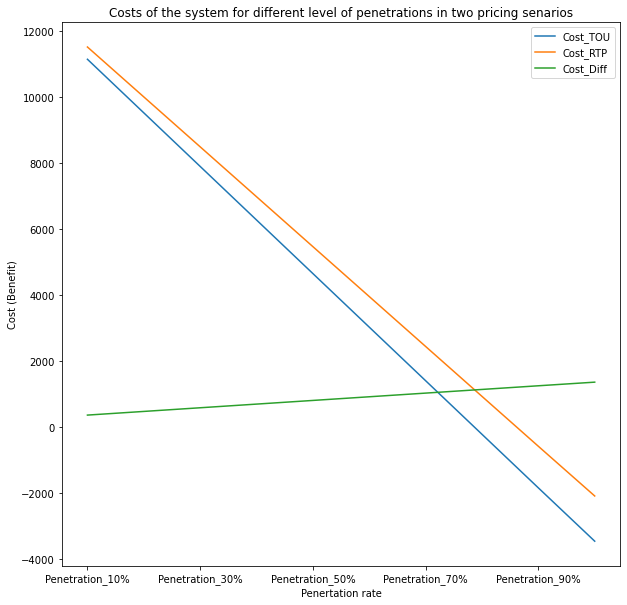

In [303]:
plot=df_scenarios.T.plot(kind='line',figsize=(10, 10))
plot.set_xlabel('Penertation rate')
plot.set_ylabel('Cost (Benefit)')
plot.set_title('Costs of the system for different level of penetrations in two pricing senarios')
plt.show()

In [304]:
df_scenarios.to_csv('result_cost_without_storage_10-100penetration.csv')

# Situatioation with different values of P_s_max

In [305]:
df_P_max_test=pd.read_csv('whole_data_ful.csv')

In [306]:
df_P_max_test

,Unnamed: 0,date_time,Real-Time,TOU,Kw/h,P_output(Kw/h),Aribitrage,result,cost_senario1,cost_senario2,...,cost_senario2_penetration_3,cost_senario2_penetration_4,cost_senario2_penetration_5,cost_senario2_penetration_6,cost_senario2_penetration_7,cost_senario2_penetration_8,cost_senario2_penetration_9,cost_senario2_penetration_10,Final_Cost_S1,Final_Cost_S2
0,0,1/1/2016 0:00,0.701849,0.5594,0.439524,0.0,0.439524,False,0.245870,0.308480,...,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480,0.308480,-3450.035164,-2079.698816
1,1,1/1/2016 1:00,0.696592,0.5594,0.355366,0.0,0.355366,False,0.198792,0.247545,...,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545,0.247545,-3450.035164,-2079.698816
2,2,1/1/2016 2:00,0.691870,0.5594,0.271904,0.0,0.271904,False,0.152103,0.188122,...,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122,0.188122,-3450.035164,-2079.698816
3,3,1/1/2016 3:00,0.636504,0.5594,0.204421,0.0,0.204421,False,0.114353,0.130115,...,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115,0.130115,-3450.035164,-2079.698816
4,4,1/1/2016 4:00,0.601309,0.5594,0.182323,0.0,0.182323,False,0.101991,0.109632,...,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632,0.109632,-3450.035164,-2079.698816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61363,61363,12/31/2022 19:00,0.171802,0.5594,0.577738,0.0,0.577738,False,0.323187,0.099256,...,0.099256,0.099256,0.099256,0.099256,0.099256,0.099256,0.099256,0.099256,-3450.035164,-2079.698816
61364,61364,12/31/2022 20:00,0.127846,0.5594,0.538820,0.0,0.538820,False,0.301416,0.068886,...,0.068886,0.068886,0.068886,0.068886,0.068886,0.068886,0.068886,0.068886,-3450.035164,-2079.698816
61365,61365,12/31/2022 21:00,0.243200,0.5594,0.513474,0.0,0.513474,False,0.287237,0.124877,...,0.124877,0.124877,0.124877,0.124877,0.124877,0.124877,0.124877,0.124877,-3450.035164,-2079.698816
61366,61366,12/31/2022 22:00,0.210816,0.5594,0.478848,0.0,0.478848,False,0.267868,0.100949,...,0.100949,0.100949,0.100949,0.100949,0.100949,0.100949,0.100949,0.100949,-3450.035164,-2079.698816


In [307]:
#df_P_max_test['result'] = df_P_max_test['Arbitrage_1'].min()
# indices2 = df_P_max_test.index[df_P_max_test['result'] == True].tolist()

min= df_P_max_test['Arbitrage_10'].min()
# # print the indices
# print(indices2)
min

-2.983011921000001